In [30]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [31]:
df=pd.read_csv("insurance.csv")

In [32]:
# checking null values
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
# Dropping categorical columns for encoding
df_cleaned=df.drop(["sex","smoker","region"],axis=1)

In [35]:
#  applying onehotencoding
oe=OneHotEncoder(dtype=np.int32, sparse_output=False)
encoded = oe.fit_transform(df[["sex","smoker","region"]])

# converting to dataframe
encoded_df = pd.DataFrame(encoded, columns=oe.get_feature_names_out(["sex", "smoker", "region"]))


In [36]:
# concatenate cleaned original DataFrame and new one-hot encoded columns
final_df=pd.concat([df_cleaned, encoded_df], axis=1)

In [37]:
x=final_df.drop("charges",axis=1)
y=final_df["charges"]

# Spliting the data into training and testing sets (80% training, 20% testing)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict on test data
y_pred = model.predict(x_test)


In [39]:

# Checking how good the model is using R2, MAE, MSE, RMSE

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R² Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


R² Score: 0.7835929767120723
MAE: 4181.194473753645
MSE: 33596915.85136147
RMSE: 5796.2846592762735


In [40]:
# Print model coefficients
for i in range(len(x_train.columns)):
    print(x_train.columns[i], ":", round(model.coef_[i], 2))

# Print model intercept
print("Intercept:", round(model.intercept_, 2))


age : 256.98
bmi : 337.09
children : 425.28
sex_female : 9.3
sex_male : -9.3
smoker_no : -11825.56
smoker_yes : 11825.56
region_northeast : 459.59
region_northwest : 88.91
region_southeast : -198.28
region_southwest : -350.21
Intercept: -574.54


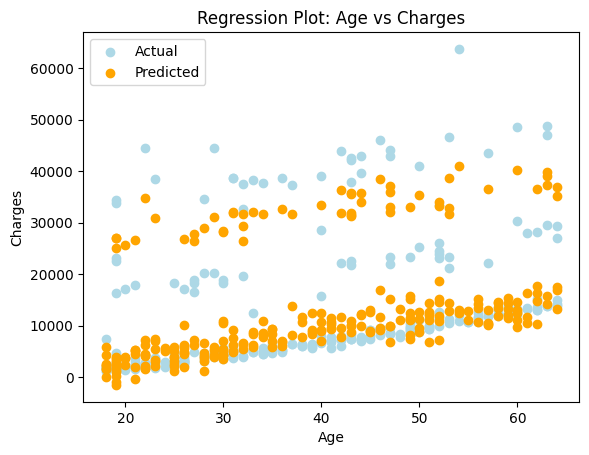

In [41]:
#  Plot for Age vs Charges
plt.scatter(x_test['age'], y_test, color='lightblue', label='Actual')
plt.scatter(x_test['age'], y_pred, color='orange', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Regression Plot: Age vs Charges')
plt.legend()
plt.show()


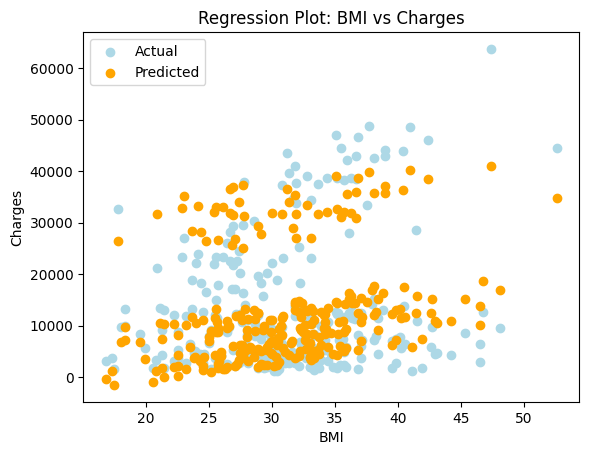

In [42]:
#  plot for BMI vs Charges
plt.scatter(x_test['bmi'], y_test, color='lightblue', label='Actual')
plt.scatter(x_test['bmi'], y_pred, color='orange', label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Regression Plot: BMI vs Charges')
plt.legend()
plt.show()


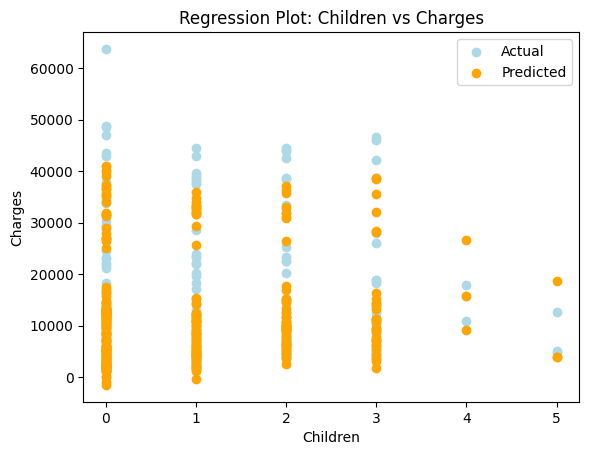

In [43]:
#  plot for Children vs Charges
plt.scatter(x_test['children'], y_test, color='lightblue', label='Actual')
plt.scatter(x_test['children'], y_pred, color='orange', label='Predicted')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.title('Regression Plot: Children vs Charges')
plt.legend()
plt.show()
